In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data 
df=pd.read_excel(r"Downloads\facebook user data.xlsx")

In [3]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(99003, 15)

In [5]:
#checking for duplicate values in the data set
df.duplicated().sum()

0

In [6]:
#Checking for null values 
df.isna().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [7]:
#there is more number of null values in the gender column so i'm filling it with mode of that particular column,why beacuse 
# we can't fill categorical data with mean or median.

In [8]:
#replacing null values with the mode of the column
df.fillna(df)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [9]:
df['gender'].mode()

0    male
dtype: object

In [10]:
df['gender'].fillna('male',axis=0,inplace=True)

In [11]:
df.tenure.mean()

537.8873748750012

In [12]:
df.tenure.min()

0.0

In [13]:
df.tenure.max()

3139.0

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


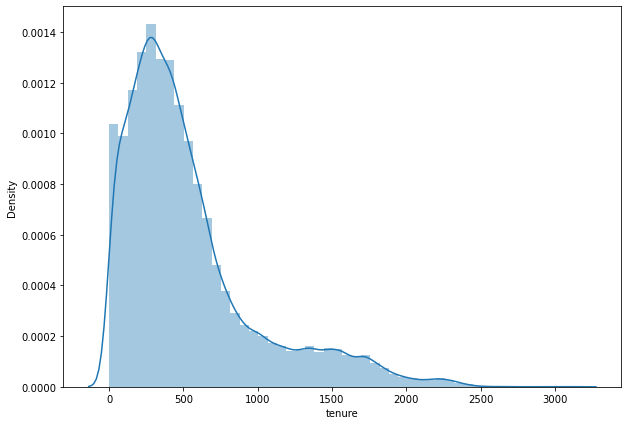

In [14]:
#checking for noise in the tenure column
plt.figure(figsize=(10,7))
sns.distplot(df.tenure)
plt.show()

In [15]:
#data is effected by noise so im filling it with median of the column

In [16]:
#filling tenure column with median 
df['tenure'].fillna(df.tenure.median(),axis=0,inplace=True)

In [17]:
df.isna().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [18]:
df.corr().T

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.003449,-0.001314,-0.001591,-0.002875,0.001526,-0.004868,0.001753,0.001828,0.001074
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,0.462696,-0.027407,-0.058059,-0.013009,-0.022570,-0.026715,-0.024248,0.015585,-0.018224
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,0.041859,0.021961,0.022999,0.015980,0.001367,0.014541,0.000497,0.009353,0.002460
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,-0.462696,0.027407,0.058059,0.013009,0.022570,0.026715,0.024248,-0.015585,0.018224
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,0.029445,0.019804,0.020075,0.014147,0.006495,0.010400,0.006435,0.012136,0.006003
tenure,-0.003449,0.462696,0.041859,-0.462696,0.029445,1.000000,0.166257,0.133507,0.057133,0.027745,0.028053,0.023971,0.070757,0.030553
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,0.166257,1.000000,0.825850,0.298017,0.236463,0.235656,0.232701,0.229803,0.220727
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,0.133507,0.825850,1.000000,0.285592,0.175131,0.229808,0.173804,0.214022,0.161439
likes,-0.002875,-0.013009,0.015980,0.013009,0.014147,0.057133,0.298017,0.285592,1.000000,0.327376,0.871652,0.329258,0.644960,0.295687
likes_received,0.001526,-0.022570,0.001367,0.022570,0.006495,0.027745,0.236463,0.175131,0.327376,1.000000,0.256998,0.973679,0.255365,0.947990


# CORRELATION MATRIX FOR ALL THE COLUMNS

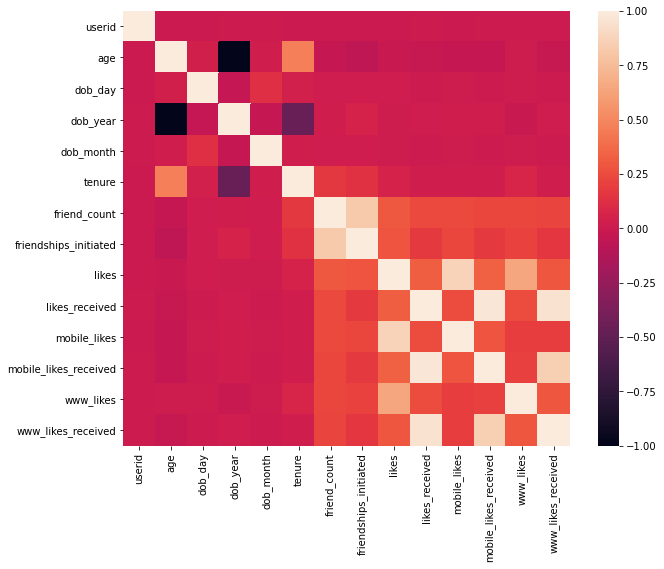

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

# ANALYSIS BASED ON THE GENDER


In [20]:
#The composition of the Male and female users

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


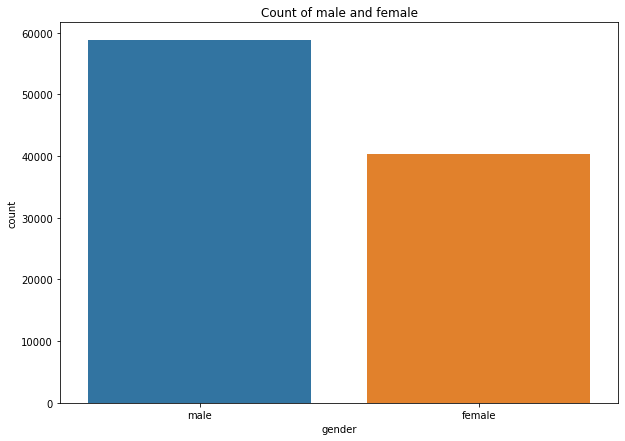

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(df.gender)
plt.title('Count of male and female')
plt.show()

In [22]:
df.gender.value_counts()/df.gender.value_counts().sum()*100

male      59.340626
female    40.659374
Name: gender, dtype: float64

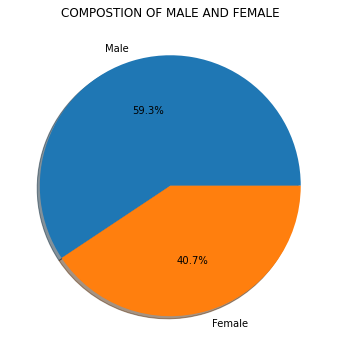

In [23]:
legend=['Male','Female']
plt.figure(figsize=(10,6))
plt.pie(df.gender.value_counts()/df.gender.value_counts().sum()*100,labels=legend,autopct='%1.1f%%',shadow=True)
plt.title('COMPOSTION OF MALE AND FEMALE')
plt.show()

In [24]:
#Male use facebook more than female

In [25]:
df[df['gender']=='male'].friend_count.max()

4917

In [26]:
df[df['gender']=='male'].friend_count.sum()

9699059

In [27]:
df[df['gender']=='female'].friend_count.max()

4923

In [28]:
df[df['gender']=='female'].friend_count.sum()

9740258

In [29]:
#there is slight diffrence between the male and female  its negligabe and in reality female users has more friends when it
#compare to male

In [30]:
##Category of gender intiate#d more friendship

In [31]:
df[df['gender']=='male'].friendships_initiated.max()

4144

In [32]:
df[df['gender']=='male'].friendships_initiated.sum()

6053223

In [33]:
df[df['gender']=='female'].friendships_initiated.max()

3654

In [34]:
df [df['gender']=='female'].friendships_initiated.sum()

4584894

In [35]:
#its clear that male intiated more friendship

In [36]:
##distribution of tenure across diffrent categories of the gender

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


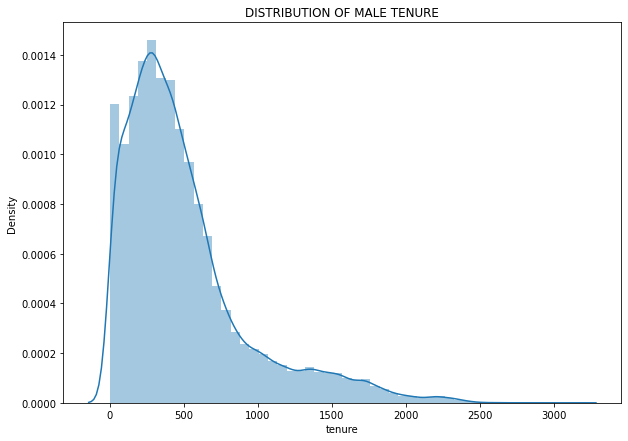

Median 394.0
Mean 504.08069924594463


In [37]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['gender']=='male'].tenure)
plt.title('DISTRIBUTION OF MALE TENURE')
plt.show()
print('Median',df[df['gender']=='male'].tenure.median())
print('Mean',df[df['gender']=='male'].tenure.mean())

In [38]:
#data is right skewed there are some outliers in the tenure 

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


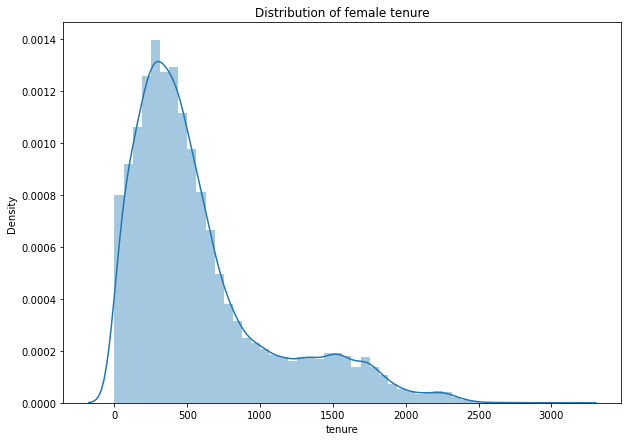

Medain 438.0
Mean 587.2205246683559


In [39]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['gender']=='female'].tenure)
plt.title('Distribution of female tenure')
plt.show()
print('Medain',df[df['gender']=='female'].tenure.median())
print('Mean',df[df['gender']=='female'].tenure.mean())

In [40]:
#The data is right skewed outlers effect the data 

# ANALYSIS BASED ON LEASET ACTIVE USERS

In [41]:
#users with no friends 
df[df['friend_count']==0]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,1395843,90,4,1923,7,male,0.0,0,0,95,78,95,56,0,22
1958,1306409,23,24,1990,1,male,48.0,0,0,164,0,164,0,0,0
1959,1838179,18,29,1995,10,female,0.0,0,0,246,100,0,9,246,91
1960,1594192,63,1,1950,1,female,57.0,0,0,271,1,271,0,0,1


In [42]:
df[df['friend_count']==0].userid.count()

1962

In [43]:
#Users who didnt like any post 
df[df['likes']==0]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98029,1792910,86,6,1927,9,male,610.0,4759,994,0,8,0,7,0,1
98030,1267270,98,29,1915,12,female,1293.0,3483,386,0,8,0,5,0,3
98031,1978609,103,4,1910,3,female,636.0,2129,640,0,2,0,2,0,0
98032,1130147,103,1,1910,4,male,1210.0,1965,856,0,4,0,2,0,2


In [44]:
df[df['likes']==0].userid.count()

22308

In [45]:
# users who recieved zero likes 

In [46]:
df[df['likes_received']==0]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98005,1883270,18,14,1995,11,female,341.0,2050,467,0,0,0,0,0,0
98016,1993020,21,8,1992,1,male,1262.0,1954,1050,0,0,0,0,0,0
98061,1680023,17,13,1996,10,female,736.0,2415,1795,3,0,0,0,3,0
98081,2022131,16,14,1997,8,male,743.0,2294,1157,6,0,6,0,0,0


In [47]:
df[df['likes_received']==0].userid.count()

24428

# Analysis based on the user accessibility(Mobile vs Web devices)

In [48]:
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [49]:
#average number of posts liked by the users 

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


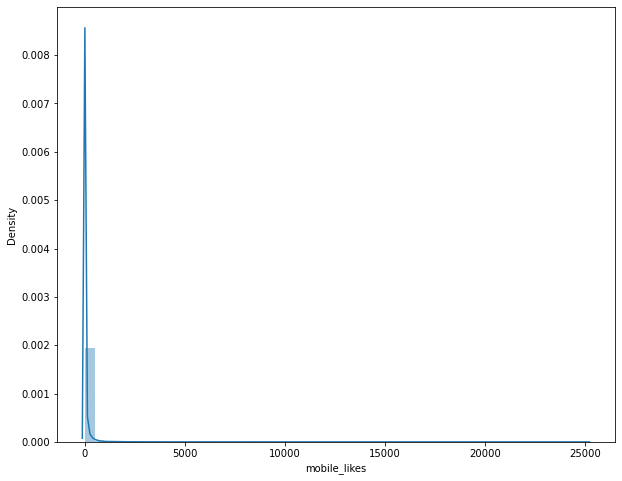

MEAN 60.348176139168324


In [50]:
plt.figure(figsize=(10,8))
sns.distplot(df[df['gender']=='male'].mobile_likes)
plt.show()
print('MEAN',df[df['gender']=='male'].mobile_likes.mean())


In [51]:
df[df['gender']=='male'].mobile_likes.mean()

60.348176139168324

In [52]:
df[df['gender']=='female'].mobile_likes.mean()

172.91292790778556

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


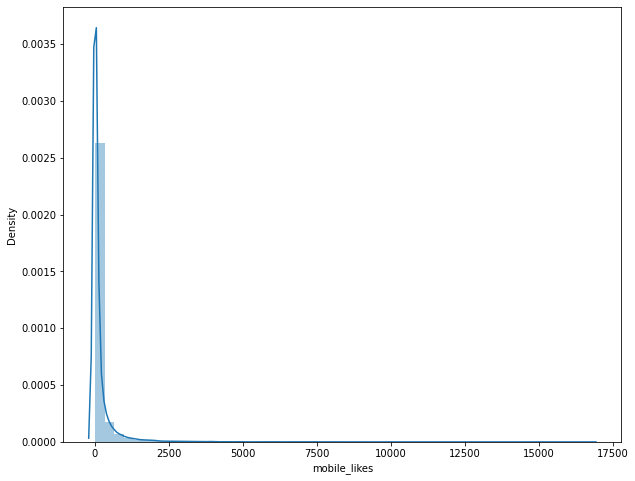

MEAN 172.91292790778556


In [53]:
plt.figure(figsize=(10,8))
sns.distplot(df[df['gender']=='female'].mobile_likes)
plt.show()
print('MEAN',df[df['gender']=='female'].mobile_likes.mean())

In [54]:
df[df['gender']=='male'].www_likes.mean()

24.490033872916985

In [55]:
df[df['gender']=='female'].www_likes.mean()

87.13829681522333

In [56]:
#most people use facebook on mobile phones so most of the likes came from facebook mobile apps users and female users got more likes
#than male users.

In [57]:
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [59]:
#Average  mobie_likes received by the male users
df[df['gender']=='male'].mobile_likes_received.mean()

40.96719944169262

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


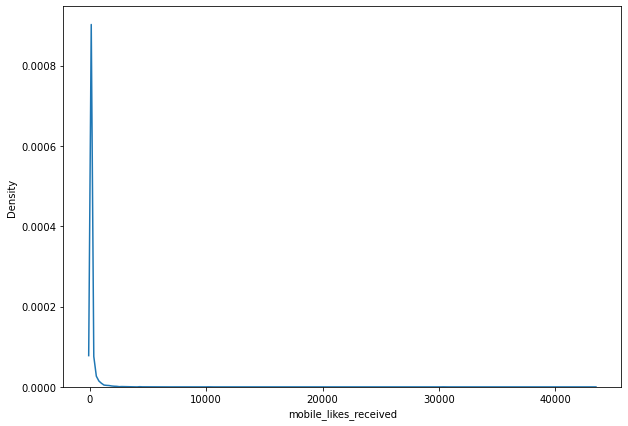

In [62]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['gender']=='male'].mobile_likes_received,hist=False)
plt.show()

In [63]:
#The average mobile_likes received by the female users
df[df['gender']=='female'].mobile_likes_received.mean()

147.1008843841606

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


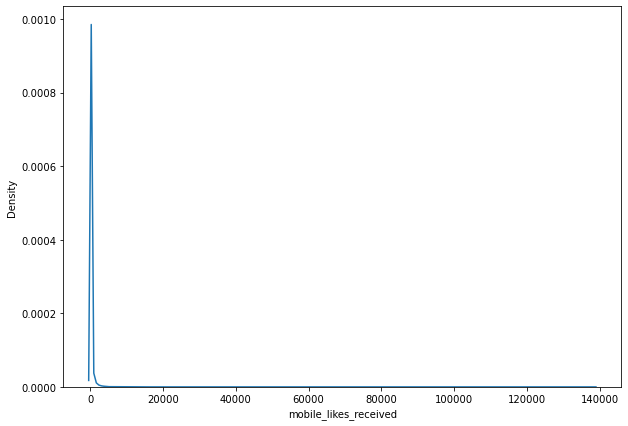

In [64]:
plt.figure(figsize=(10,7))
sns.distplot(df[df['gender']=='female'].mobile_likes_received,hist=False)
plt.show()

In [66]:
#The average likes web received by the male users
df[df['gender']=='male'].www_likes_received.mean()

27.210863163628318

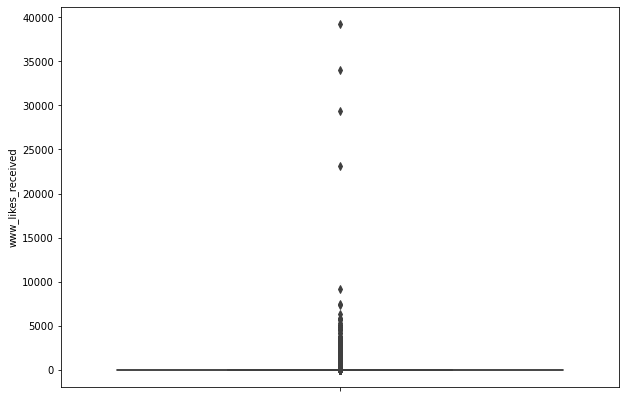

In [73]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df[df['gender']=='male'].www_likes_received)
plt.show()

In [68]:
#The average  web likes received by the female users
df[df['gender']=='female'].www_likes_received.mean()

104.33445123465991

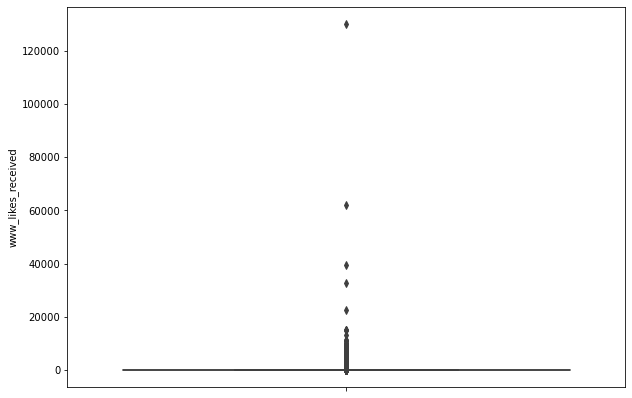

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df[df['gender']=='female'].www_likes_received)
plt.show()

In [ ]:
#most likes recieved from the facebook mobile app and the most likes are recieved by the female users followed by male .


In [ ]:
#MOST OF THE USERS ARE LIKE TO USE FACEBOOK ON THEIR MOBILE PHONES BECAUSE IT IS EASY TO CARRY AND MOST OF THEM HAVE MOBILE
# BECAUSE OF ITS AFFORDABILITY.